# Class Single Recording Code

Developing Code for Single Recordings
- Filtering
- Whole Trace Observations
- Epoch Extraction
- PSTHS

In [1]:
import tdt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from single_tdt_class import *

In [2]:
single_recording_path = r"D:\Pilot 2\Cohort 2\Synapse\Tanks\P2_2_Pinch_Test-240820-080344\n6-240820-090055"
csv_base_path = r"C:\Users\alber\OneDrive\Documents\GitHub\PCLAB_Photometry\P2_Code\08_20_24_C2_Pinch_Test\n6-240820-090055.csv"

## Bout Data from CSV

In [3]:
tdt_data = tdt.read_block(single_recording_path)
# Assuming `tdt_data` is already loaded
tdt_data_obj = TDTData(tdt_data, single_recording_path)

tdt_data_obj.extract_manual_annotation_behaviors(csv_base_path)

# Remove specified time range
# tdt_data_obj.remove_time(start_time=780, end_time=921)

Found Synapse note file: D:\Pilot 2\Cohort 2\Synapse\Tanks\P2_2_Pinch_Test-240820-080344\n6-240820-090055\Notes.txt
read from t=0s to t=225.14s


## Plot Raw Trace

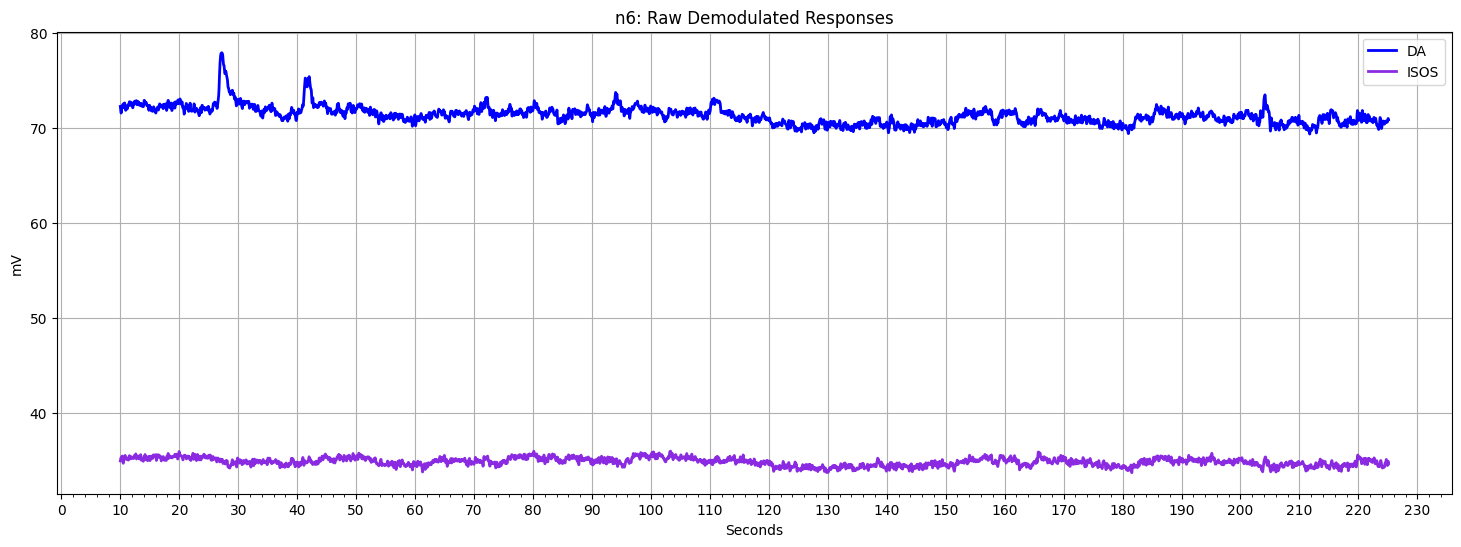

In [4]:
# Remove initial LED artifact
tdt_data_obj.remove_initial_LED_artifact(t=10)

tdt_data_obj.smooth_signal()
tdt_data_obj.verify_signal()
# Plot raw trace
tdt_data_obj.plot('raw')

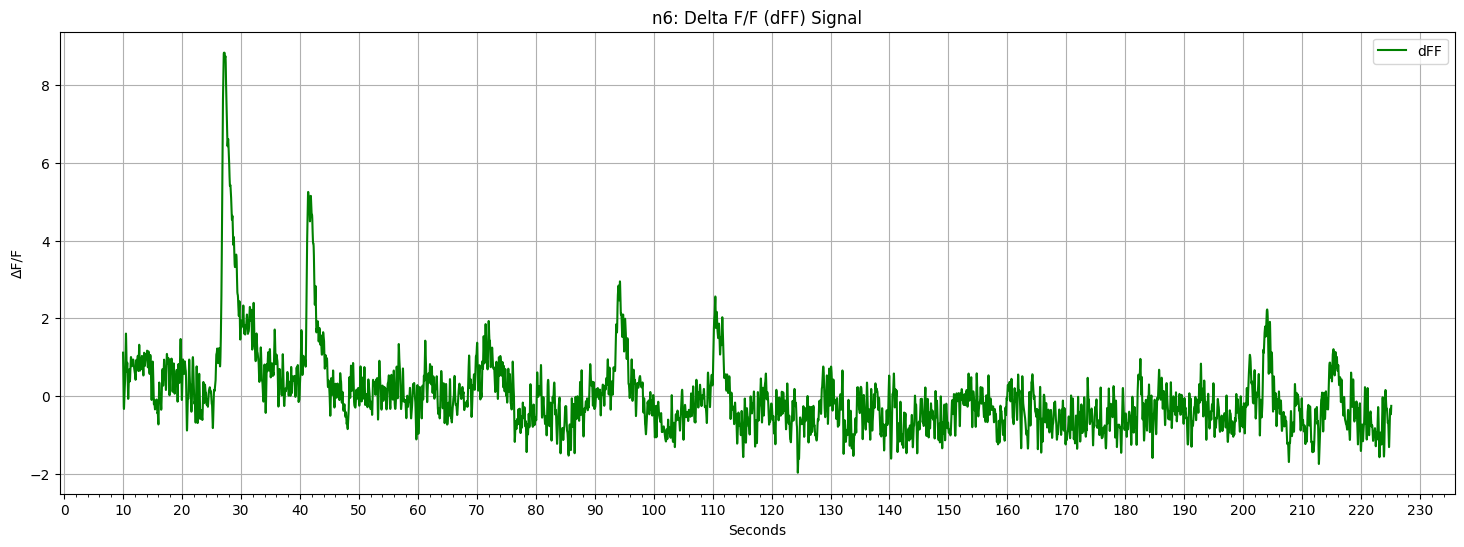

In [5]:
# Downsample the data
# tdt_data_obj.downsample_data(N = 200)


# Compute dFF
tdt_data_obj.compute_dff()
tdt_data_obj.plot('dFF')

In [6]:
tdt_data_obj.compute_zscore()

In [7]:
tdt_data_obj.subject_name

'n6'

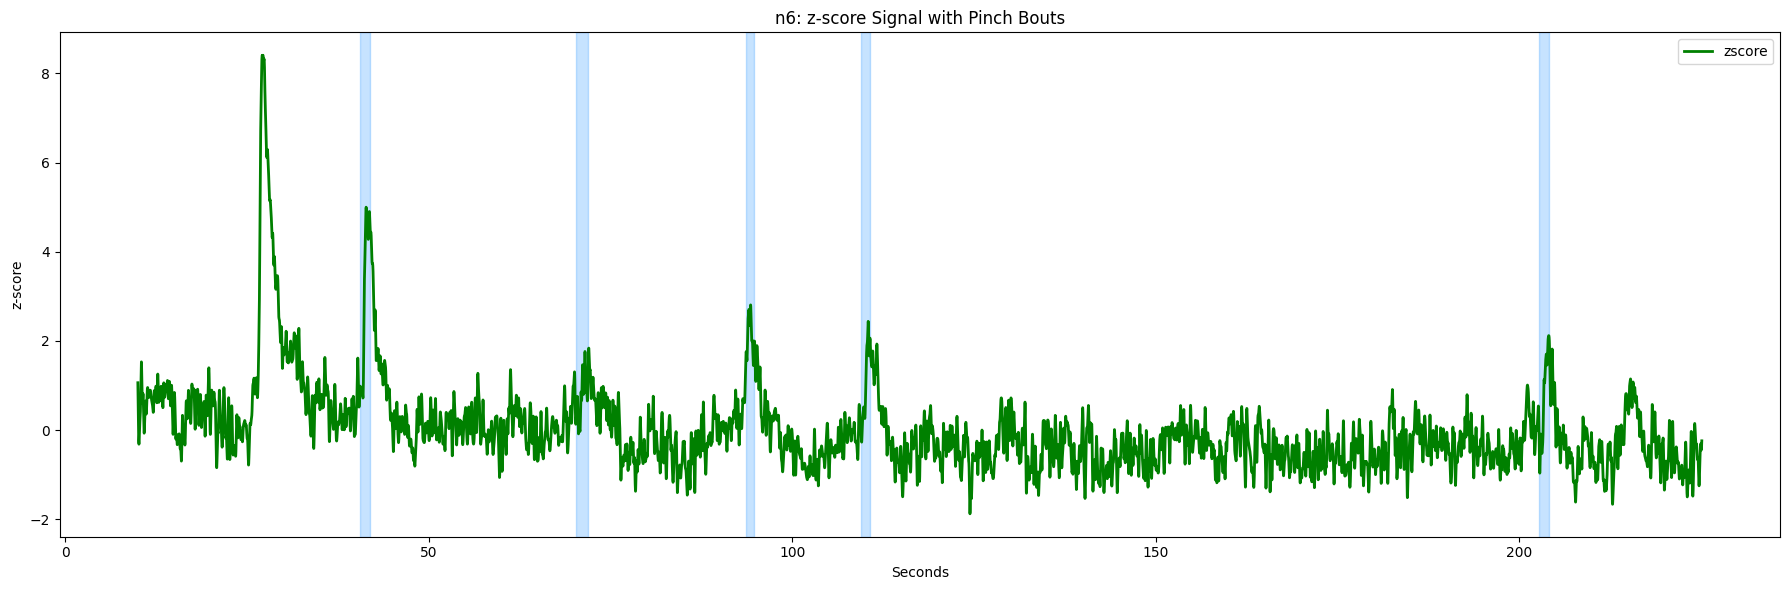

In [8]:
# tdt_data_obj.combine_consecutive_behaviors('', bout_time_threshold=2, min_occurrences=1)
tdt_data_obj.plot_behavior_event('Pinch', plot_type='zscore')

In [9]:
tdt_data_obj.remove_time(24, 33)

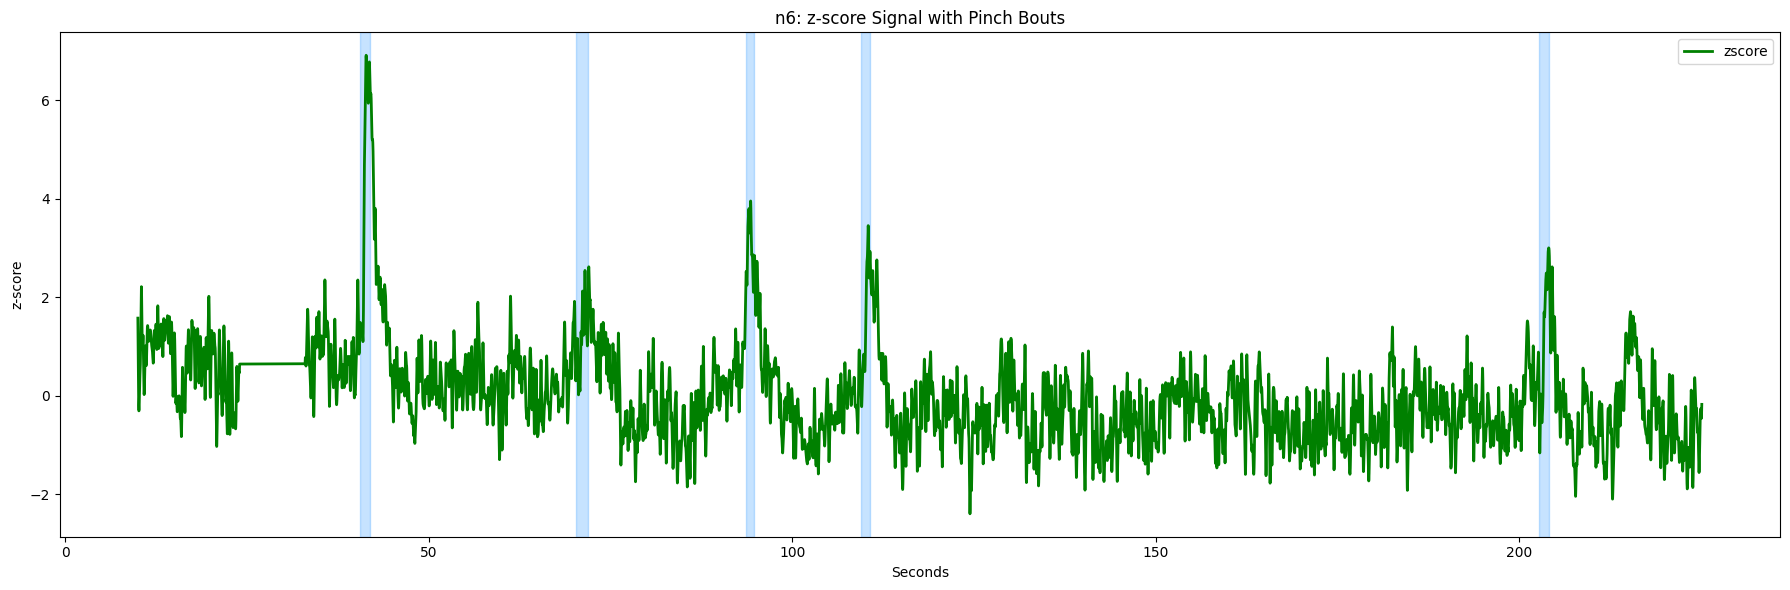

In [10]:
tdt_data_obj.plot_behavior_event('Pinch', plot_type='zscore')

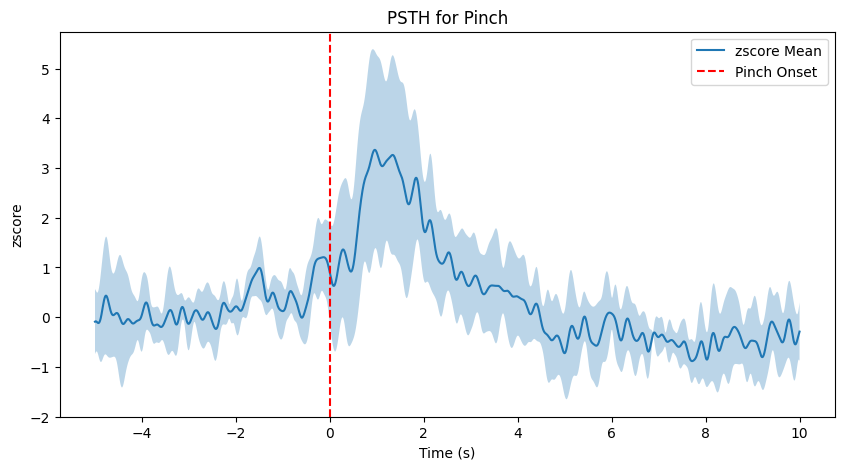

In [11]:
tdt_data_obj.plot_psth('Pinch', 'zscore')